### 가우스 혼합 모델

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

path = os.path.join(os.getcwd(), 'old_faithful.txt')
xs = np.loadtxt(path)

print(xs.shape)
print(xs[0])

(272, 2)
[ 3.6 79. ]


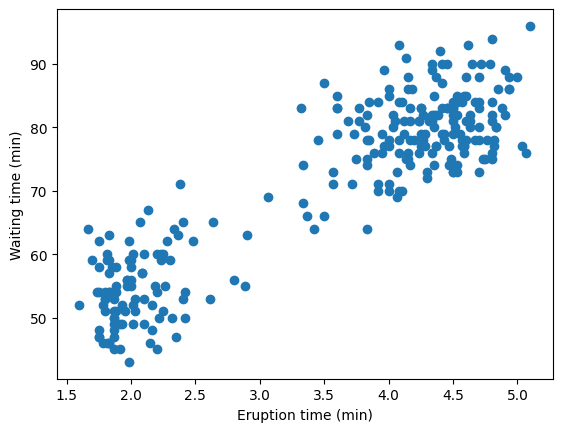

In [4]:
plt.scatter(xs[:, 0], xs[:, 1])
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time (min)')
plt.show()

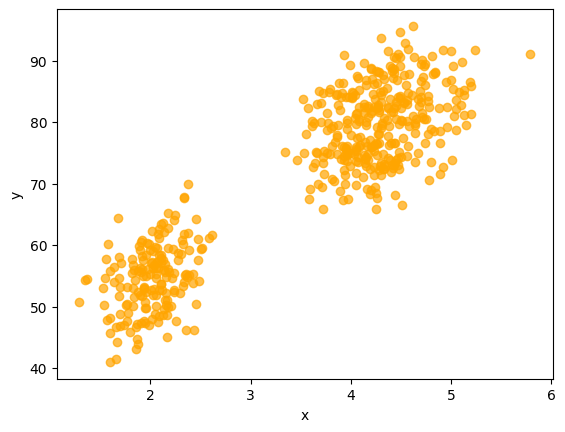

In [11]:
import numpy as np

mus = np.array([[2.0, 54.50], [4.3, 80.0]])
covs = np.array([[[0.07, 0.44], [0.44, 33.7]], [[0.17, 0.94], [0.94, 36.00]]])
phis = np.array([0.35, 0.65])

def sample():
    z = np.random.choice(2, p=phis)
    mu, cov = mus[z], covs[z]
    x = np.random.multivariate_normal(mu, cov)
    return x

N = 500
xs = np.zeros((N, 2))
for i in range(N):
    xs[i] = sample()

plt.scatter(xs[:, 0], xs[:, 1], color='orange', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.show()



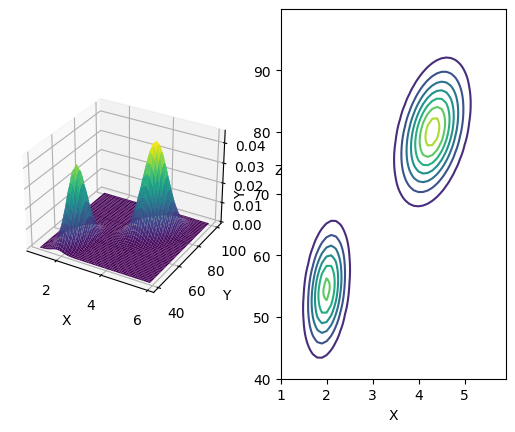

In [16]:
import numpy as np
import matplotlib.pyplot as plt

mus = np.array([[2.0, 54.50], [4.3, 80.0]])
covs = np.array([[[0.07, 0.44], [0.44, 33.7]], [[0.17, 0.94], [0.94, 36.00]]])
phis = np.array([0.35, 0.65])

def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    d = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** d * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

def gmm(x, phis, mus, covs):
    K = len(phis)
    y = 0
    for k in range(K):
        phi, mu, cov = phis[k], mus[k], covs[k]
        y += phi * multivariate_normal(x, mu, cov)

    return y

xs = np.arange(1, 6, 0.1)
ys = np.arange(40, 100, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = gmm(x, phis, mus, covs)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.contour(X, Y, Z)
plt.show()
